In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
from google.colab import files


### Import data

In [ ]:
data = pd.read_excel('2018-pp.xlsx')
data = data.drop(columns=['Unnamed: 0'])
print(data.head())


### Edit data

In [ ]:
# change all NaN values with 0
#data = data.replace(np.nan,0)
print(data.head())

#change date format
data['date'] = pd.to_datetime(data['date'], format="%d.%m.%Y.")


In [ ]:
#sort everything from 2018 to 2021
new_data = data.loc[::-1]
print(new_data.head())

In [ ]:
#new_data = new_data.drop(columns=['text'])
new_data = new_data.drop(0)
new_data['year'] = new_data['date'].dt.year
new_data['months']= new_data['date'].dt.month
new_data['date']= new_data['date'].dt.date



### Create figures

In [6]:
# nan value ffill (forward fill methos) changes for previous value

new_data['number_of_fires'] = new_data['number_of_fires'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['number_of_flights'] = new_data['number_of_flights'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['hours_of_flights'] = new_data['hours_of_flights'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['tons_of_water'] = new_data['tons_of_water'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['tons_of_cargo'] = new_data['tons_of_cargo'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['liters_of_foam'] = new_data['liters_of_foam'].replace(0, pd.NA).fillna(method='ffill').fillna(0)
new_data['liters_of_fuel'] = new_data['liters_of_fuel'].replace(0, pd.NA).fillna(method='ffill').fillna(0)


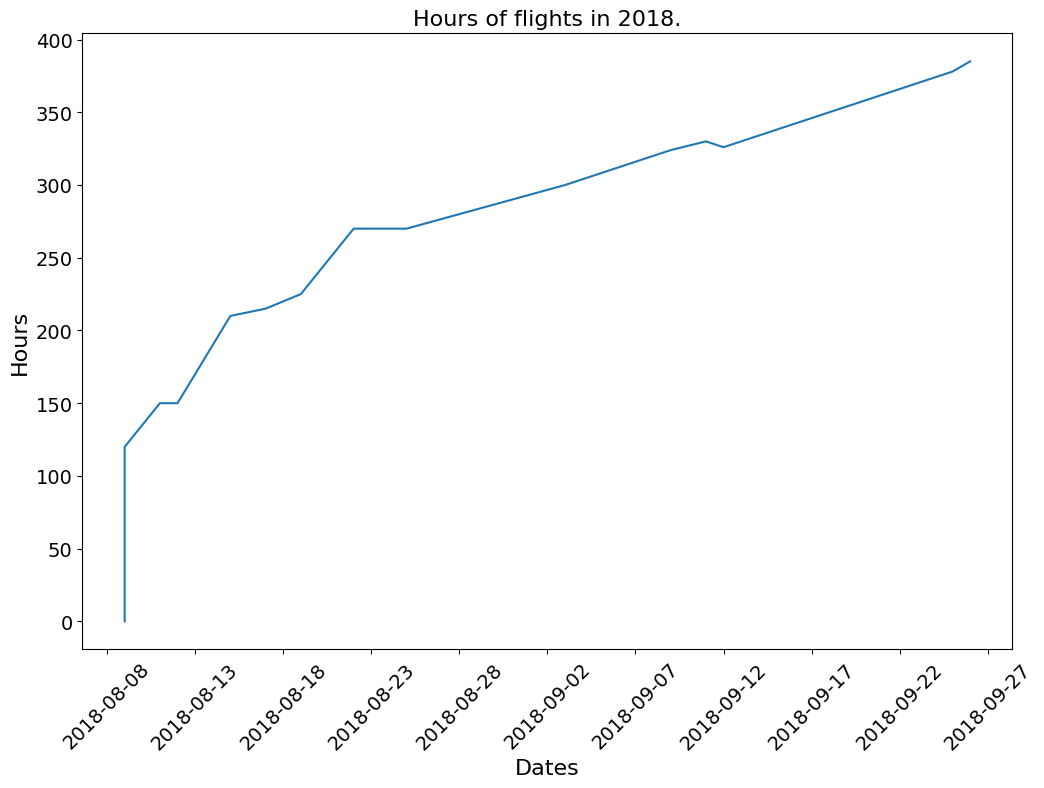

In [7]:

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(new_data.date, new_data.hours_of_flights, label="hours of flights")

# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Display every 10 days
plt.xlabel("Dates", fontsize=16)
plt.ylabel("Hours", fontsize=16)
plt.title("Hours of flights in 2018.", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#plt.legend()
plt.show()




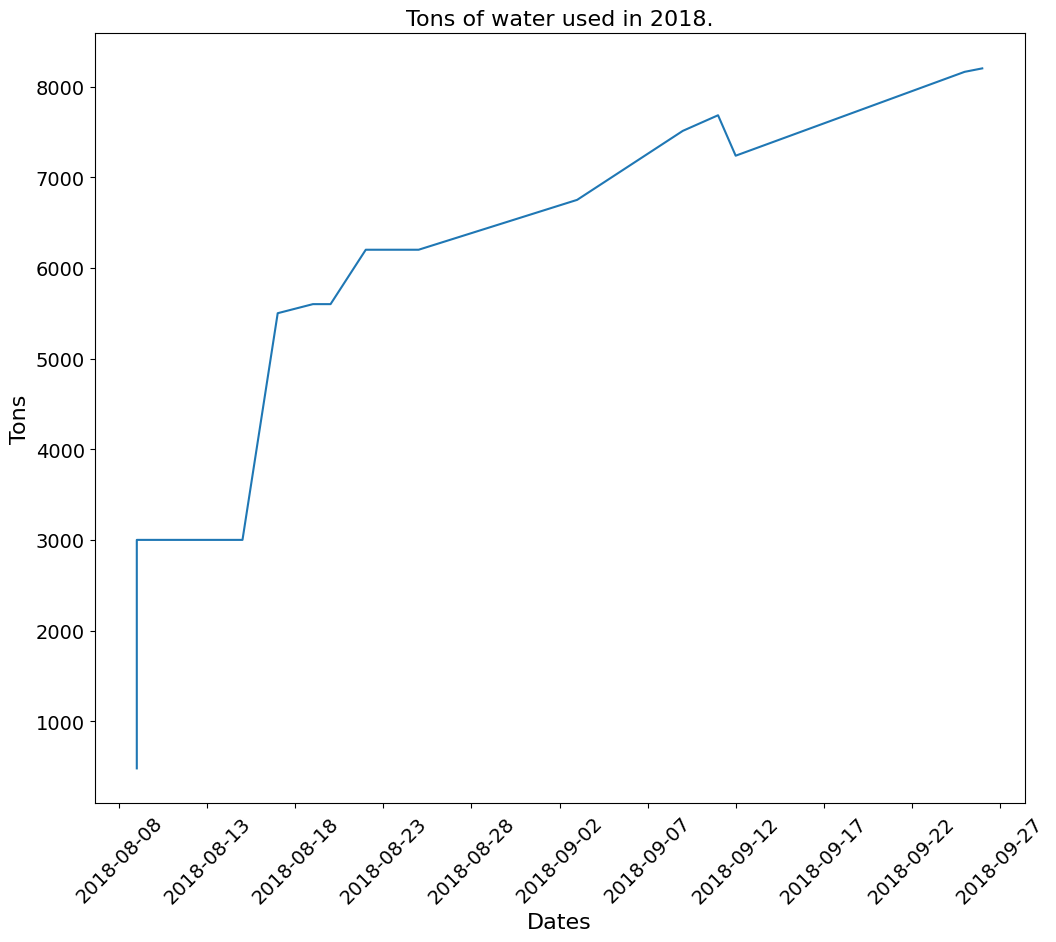

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(new_data.date, new_data.tons_of_water, label="tons_of_water")

# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Display every 5 days
plt.xlabel("Dates", fontsize=16)
plt.ylabel("Tons", fontsize=16)
plt.title("Tons of water used in 2018.", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#plt.legend()
plt.show()




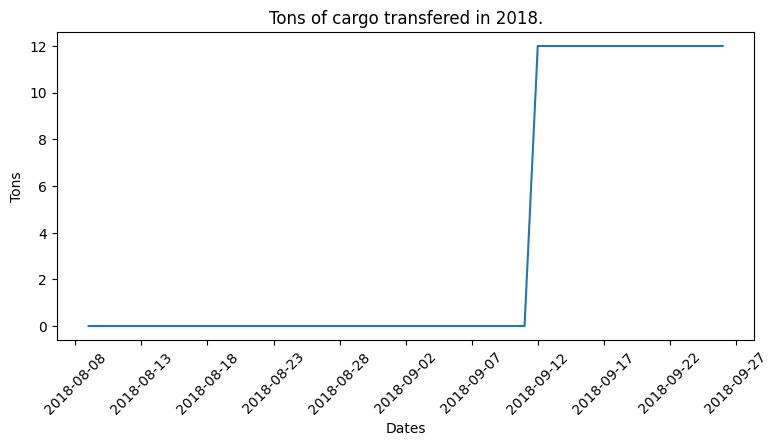

In [9]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.plot(new_data.date, new_data.tons_of_cargo, label="tons_of_cargo")
# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xlabel("Dates")
plt.ylabel("Tons")
plt.title("Tons of cargo transfered in 2018.")
plt.xticks(rotation=45)
#plt.legend()
plt.show()




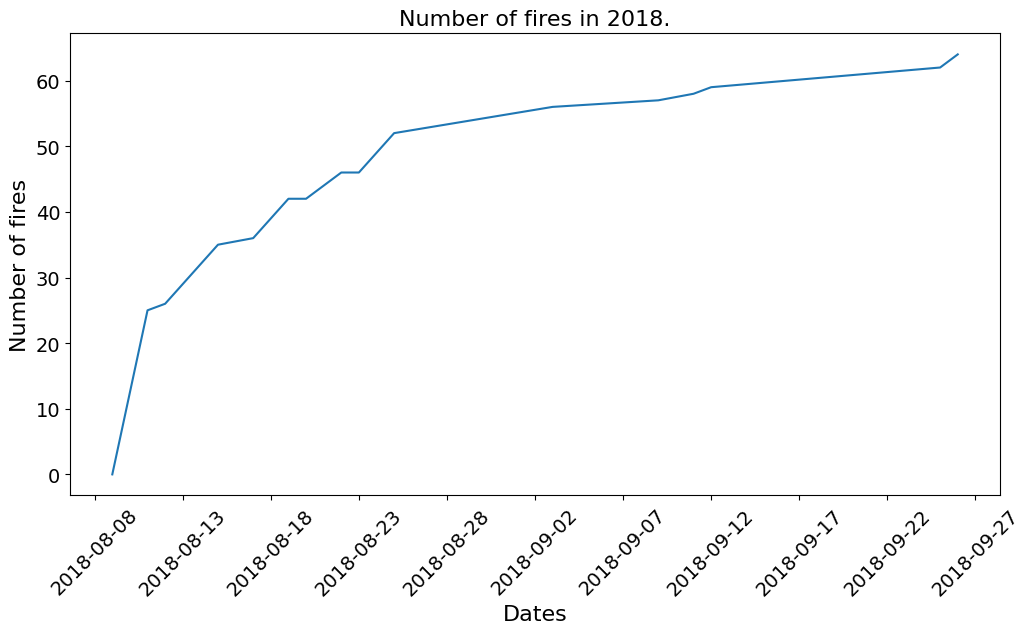

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(new_data.date, new_data.number_of_fires, label="number_of_fires")
# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xlabel("Dates", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)
plt.title("Number of fires in 2018.", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#plt.legend()
plt.show()




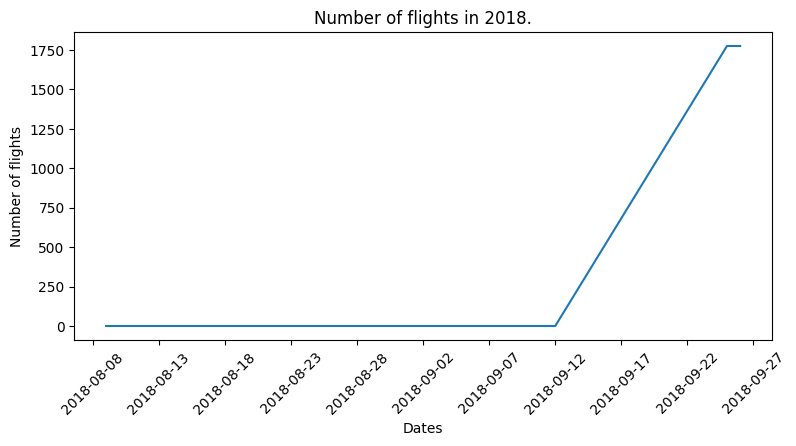

In [11]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.plot(new_data.date, new_data.number_of_flights, label="number_of_flights")
# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xlabel("Dates")
plt.ylabel("Number of flights")
plt.title("Number of flights in 2018.")
plt.xticks(rotation=45)
#plt.legend()
plt.show()




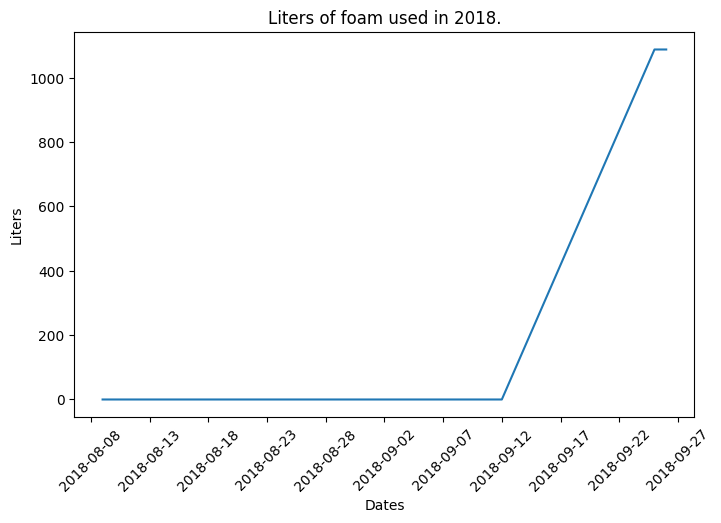

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(new_data.date, new_data.liters_of_foam, label="liters_of_foam")
# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xlabel("Dates")
plt.ylabel("Liters")
plt.title("Liters of foam used in 2018.")
plt.xticks(rotation=45)
#plt.legend()
plt.show()




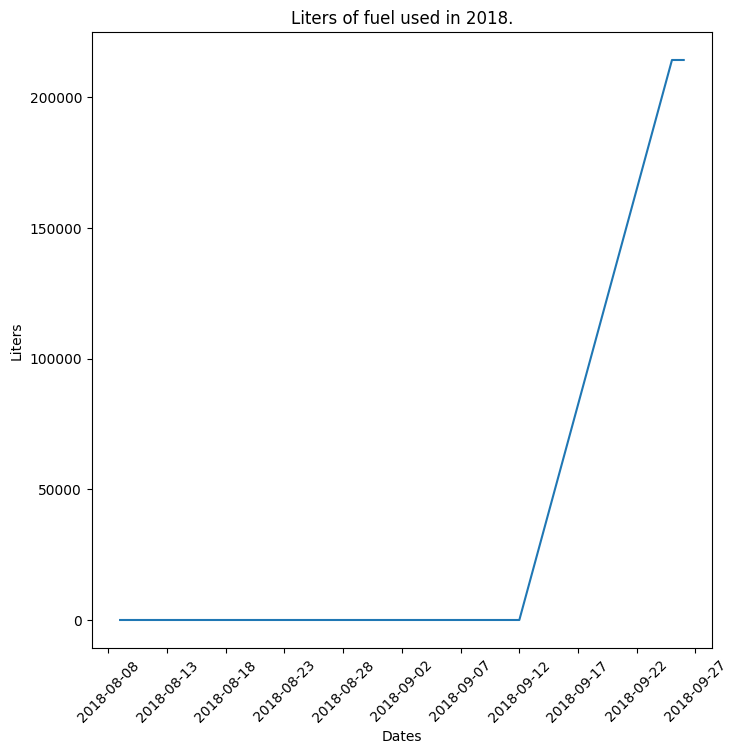

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(new_data.date, new_data.liters_of_fuel, label="liters_of_fuel")
# Set the x-axis formatter to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the desired step size or interval for displaying dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xlabel("Dates")
plt.ylabel("Liters")
plt.title("Liters of fuel used in 2018.")
plt.xticks(rotation=45)
#plt.legend()
plt.show()




## Bar charts for number of used aircrafts per month

In [ ]:
new_data = new_data.replace(np.nan,0)
sum_data = new_data.groupby([(new_data.year), (new_data.months)]).sum().reset_index()
sum_data

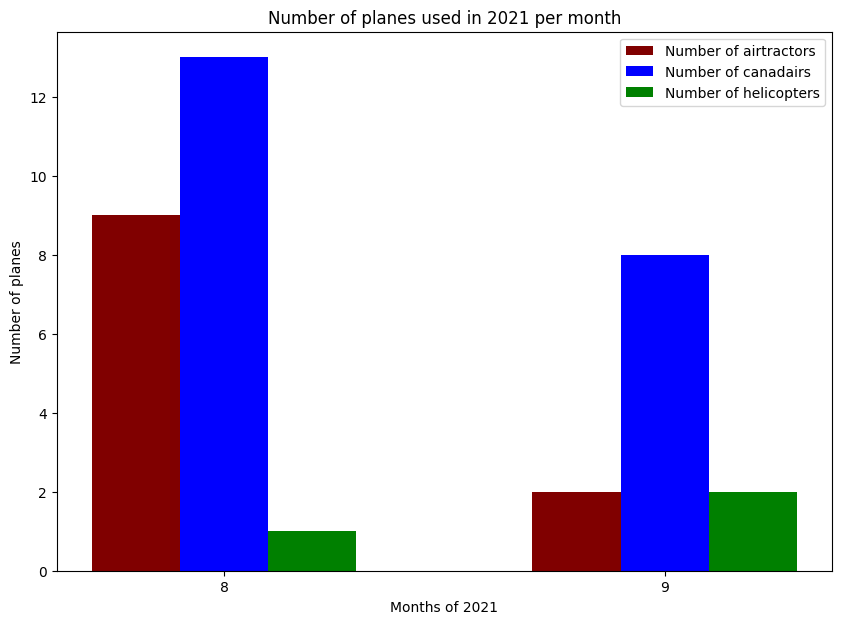

In [15]:
plt.figure(figsize=(10,7))
plt.bar(sum_data.months - 0.2, sum_data.number_of_airtractors, color ='maroon', width = 0.2, label = 'Number of airtractors')
plt.bar(sum_data.months, sum_data.number_of_canadairs, color ='blue', width = 0.2, label = 'Number of canadairs')
plt.bar(sum_data.months + 0.2, sum_data.number_of_helicopters, color ='green', width = 0.2, label = 'Number of helicopters')

plt.xticks(sum_data.months)
plt.xlabel("Months of 2021")
plt.ylabel("Number of planes")
plt.title("Number of planes used in 2021 per month")
plt.legend()
plt.show()